# Regression

### Import libraries, classes and functions

In [2]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

### Simulate two stock prices

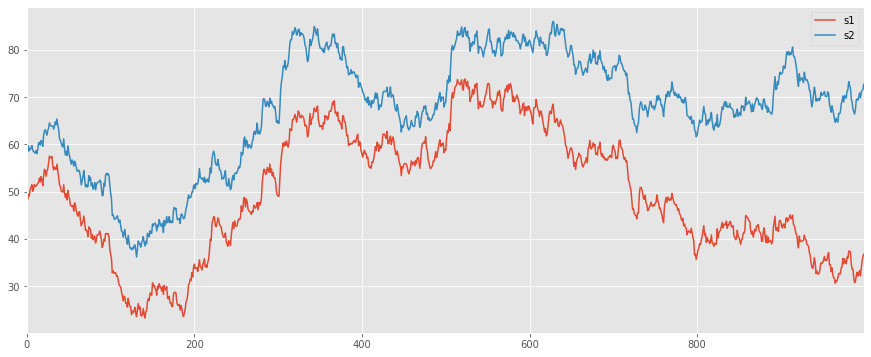

In [11]:
# Just set the seed for the random number generator
np.random.seed(100)
# use returns to create a price series 
drift = 100
r0 = pd.Series(np.random.normal(0,1,1000))
s0 = pd.Series(np.cumsum(r0), name = 's0') + drift

noise1 = np.random.normal(0, 0.4, 1000)
drift1 = 50
r1 = r0 + noise1
s1 = pd.Series(np.cumsum(r1), name='s1') + drift1

noise2 = np.random.normal(0, 0.4, 1000)
drift2 = 60
r2 = r0 + noise2
s2 = pd.Series(np.cumsum(r2), name='s2') + drift2

pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

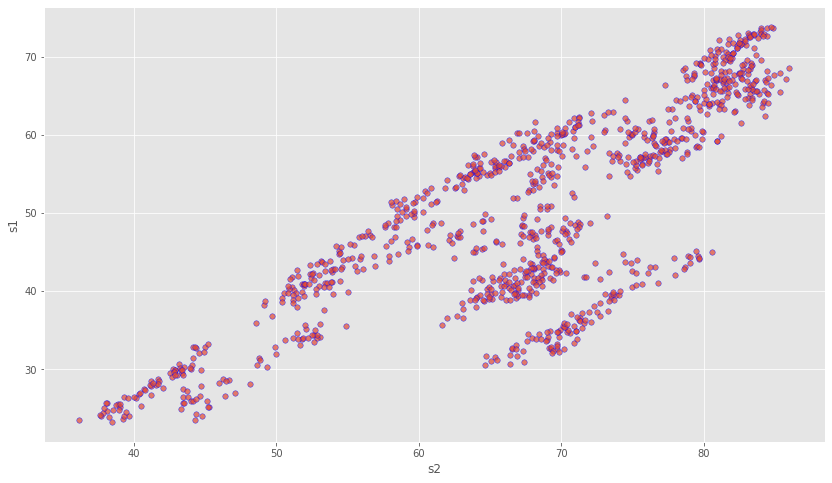

In [17]:
## Plot data with scatterplot 
sc = plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.7)
plt.xlabel('s2')
plt.ylabel('s1');

In [14]:
from sklearn.linear_model import LinearRegression

In [ ]:
def regression_slope_and_intercept(xSeries, ySeries):
    """
    xSeries: pandas series, x variable
    ySeries: pandas series, y variable
    """
    lr = LinearRegression()
    #TODO: get the values from each series, reshape to be 2 dimensional
    #set s1 to the x variable, s2 to the y variable
    xVar = xSeries.values.reshape(-1,1)
    yVar = ySeries.values.reshape(-1,1)
    
    #TODO: call LinearRegression.fit().  Pass in the x variable then y variable
    reg = LinearRegression().fit(xVar, yVar)
    
    #TODO: obtain the slope and intercept
    slope = reg.coef_[0][0]
    intercept = reg.intercept_[0]
    print(intercept)
    
    return (slope, intercept)

quiz_tests.test_regression_slope_and_intercept(regression_slope_and_intercept);

In [ ]:
slope, intercept = regression_slope_and_intercept(s1,s2);
print(f"slope {slope:.2f} and intercept {intercept:.2f}")

### Plot the fitted regression line over the scatterplot

In [ ]:
plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.5);
x = np.linspace(s1.min()-5, s1.max()+5, 2)
yPred = slope * x + intercept
plt.plot(yPred,x, alpha=0.2, lw=3, color='r')
plt.xlabel('s2')
plt.ylabel('s1');